In [1]:
#Importing Libraries needed for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests
import json
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Reading csv file.
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

twitter_archive.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Gather image predictions tsv file
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request_images = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(request_images.content)
    
#Read tsv file into dataframe.
images = pd.read_csv('image-predictions.tsv', sep='\t')

images.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#how to query data via Twitter API
#you need to import Tweepy

'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '
'''

#using Tweepy library
'''
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
'''

'\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n'

In [6]:
#Using the tweet_json file provided in the Udacity classroom because I could not get permission to use twitter api.
#Read tweet-json.txt to dataframe.
tweets_json = pd.read_json('tweet_json.txt',lines=True)

tweets_json.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

> **NOTE:**
> Some of the visual assessments were done using Excel.

In [7]:
## Visually display each dataframe along with their descriptions.
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
tweets_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [12]:
#we only need a few columns so we will take the once we need only and leave the rest.
tweet_json = tweets_json[['id', 'retweet_count', 'favorite_count']]

In [13]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [14]:
#check data for duplicates.
twitter_archive.duplicated().sum()

0

In [15]:
#Look for missing values in name column.
twitter_archive.name.isna().sum()

0

In [16]:
#Let us see values under "name"
# we want to see as much infomation as we can.
pd.set_option('display.max_rows', None, 'display.max_columns', None)
twitter_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
Toby                7
an                  7
Buddy               7
Bailey              7
Daisy               7
Oscar               6
Rusty               6
Koda                6
Milo                6
Dave                6
Scout               6
Jax                 6
Jack                6
Stanley             6
Bella               6
Leo                 6
Alfie               5
very                5
Louis               5
Chester             5
George              5
Gus                 5
Larry               5
Bentley             5
Phil                5
Sunny               5
Oakley              5
Sammy               5
Finn                5
Duke                4
Scooter             4
Ruby                4
Bruce     

In [17]:
#We'll have a look at the denominator values
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
np.sort(twitter_archive['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170], dtype=int64)

In [19]:
#We'll have a look at the numerator values
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
np.sort(twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [21]:
#Taking a look at the timestamp column
twitter_archive.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

### Quality issues

1. tweets_json table: column "id" is different from the other table's id names which are "tweet_id".

2. * Remove retweets and replies from the dataset before removing columns you won't need.
   * Not all columns are essential for the analysis so we drop them.

3. twitter_archive table: 'timestamp' has (+0000).

4. twitter_archive table: 'timestamp' datatype is object and not datetime.

5. twitter_archive table: column 'name' has data such as 'none' and lower case names that seem to be incorrect.

6. twitter_archive table: column 'rating_denominator' has values that are not 10.

7. twitter_archive table: column 'rating_numerator' has values above 10.

8. twitter_archive table: column 'source' has html referencing code (<a href="link"/a>)



#### Tidiness issues
1. Merge twitter_archive, images and tweet_json together.

2. twitter_archive table: columns 'doggo', 'floofer', 'pupper', 'puppo' should be under 1 column as 'dog_stage'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive.copy()
clean_images = images.copy()
clean_tweets = tweet_json.copy()

### Issue #1:

#### Define: 
* tweets table: column "id" does not match "id" of other dataframes("tweet_id")

#### Code

In [23]:
#Code to rename column name.
clean_tweets = clean_tweets.rename(columns={'id':'tweeet_id'})

#realised that I missplelt "tweet_id" so the code below will I will rename again to correct my error.
clean_tweets = clean_tweets.rename(columns={'tweeet_id':'tweet_id'})


#### Test

In [24]:
#Display the changes.
clean_tweets.head(2)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Tidiness  #1:

#### Define
* merge the 3 dataframes together to make 1 dataframe.
* Now that we have renamed tweet_id and it's uniform throughout all dataframes, we will merge the dataframes to 1.

#### Code

In [25]:
#using merge to join tweets and images to twitter archive
full_clean_archives = pd.merge(clean_twitter_archive, clean_tweets, how='inner', on='tweet_id')


In [26]:
full_clean_archive = pd.merge(full_clean_archives, clean_images, how='inner', on='tweet_id')

#### Test

In [27]:
#now we check the full new dataframe
full_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Tidiness #2:

#### Define
* merge columns 'doggo', 'floofer', 'pupper', 'puppo' into 1 column (dog_stage) 

#### Code

In [28]:
#function to replace 'none' with null values.
list_dog_stage = ['doggo', 'floofer','pupper','puppo']
for i in list_dog_stage:
    full_clean_archive[i] = full_clean_archive[i].replace('None', '')
    

In [29]:
#Create a new column 'dog_stage' that will have information of the doggo,floofer,pupper,puppo
full_clean_archive['dog_stage'] = full_clean_archive.doggo.str.cat(full_clean_archive.floofer).str.cat(full_clean_archive.pupper).str.cat(full_clean_archive.puppo)



In [30]:
full_clean_archive.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [31]:
#because some value have more than 1 dogstage, we have to distinguish that and name it 'multiple'

full_clean_archive['dog_stage'] = full_clean_archive['dog_stage'].replace('doggopuppo', 'multiple')
full_clean_archive['dog_stage'] = full_clean_archive['dog_stage'].replace('doggofloofer', 'multiple')
full_clean_archive['dog_stage'] = full_clean_archive['dog_stage'].replace('doggopupper', 'multiple')


In [32]:
full_clean_archive.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'],
      dtype=object)

In [33]:
#drop columns that make up dog_stage.
full_clean_archive = full_clean_archive.drop(columns = ['doggo','floofer','pupper','puppo'])

In [34]:
full_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  retweet_count               2073 

In [35]:
full_clean_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,


### Issue #2:

 #### Define 2.1: 
* we do not want retweets on our dataset.

#### Code

In [37]:
#this code will remove retweet rows.
full_clean_archive = full_clean_archive[pd.isnull(full_clean_archive.retweeted_status_id)]

In [38]:
#this code will remove replies rows.
full_clean_archive = full_clean_archive[pd.isnull(full_clean_archive.in_reply_to_status_id)]

#### Define 2.2: 
* Get rid of columns that are not needed in the dataset.

#### Code

In [39]:
#this code will drop columns we don't need.
full_clean_archive.drop(['text','expanded_urls','retweeted_status_id',
                         'retweeted_status_user_id','retweeted_status_timestamp',
                         'expanded_urls','in_reply_to_status_id','in_reply_to_user_id'
                  ], axis = 1, inplace=True)

#### Test

In [40]:
full_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   rating_numerator    1971 non-null   int64  
 4   rating_denominator  1971 non-null   int64  
 5   name                1971 non-null   object 
 6   retweet_count       1971 non-null   int64  
 7   favorite_count      1971 non-null   int64  
 8   jpg_url             1971 non-null   object 
 9   img_num             1971 non-null   int64  
 10  p1                  1971 non-null   object 
 11  p1_conf             1971 non-null   float64
 12  p1_dog              1971 non-null   bool   
 13  p2                  1971 non-null   object 
 14  p2_conf             1971 non-null   float64
 15  p2_dog              1971 non-null   bool   
 16  p3    

### Issue 3:

#### Define:
* Get rid of the '+0000' from the timestamp column.

In [41]:
full_clean_archive.timestamp.head(1)

0    2017-08-01 16:23:56 +0000
Name: timestamp, dtype: object

In [42]:
#Using strip to take out the +0000 from data.
full_clean_archive.timestamp = full_clean_archive.timestamp.str.strip('+0000')

#### Test

In [43]:
full_clean_archive.timestamp.head(3)

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
Name: timestamp, dtype: object

### Issue 4:

#### Define: 
* Change timestamp datatype from object to datetime.

#### Code

In [44]:
#code that will convert datatype of timestamp.
full_clean_archive['timestamp'] = full_clean_archive['timestamp'].astype('datetime64[ns]')


#### Test

In [45]:
full_clean_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   rating_numerator    1971 non-null   int64         
 4   rating_denominator  1971 non-null   int64         
 5   name                1971 non-null   object        
 6   retweet_count       1971 non-null   int64         
 7   favorite_count      1971 non-null   int64         
 8   jpg_url             1971 non-null   object        
 9   img_num             1971 non-null   int64         
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
 12  p1_dog              1971 non-null   bool          
 13  p2                  1971 non-null   object      

### Issue 5

#### Define:
* Remove uppercase names.
* drop remaining rows that are none and null.

#### Code 

In [46]:
#this code will fine uppercase names
full_clean_archive['name']= full_clean_archive.name.str.extract('\\b([A-Z]\\S*)\\b')

#drop rows that are null
full_clean_archive.dropna(subset=['name'], inplace=True)

#Dropnames that are named none
full_clean_archive= full_clean_archive[full_clean_archive.name!='None']

#### Test

In [47]:
full_clean_archive.name.value_counts()

Charlie           11
Lucy              10
Oliver            10
Cooper            10
Tucker             9
Penny              9
Sadie              8
Winston            8
Lola               7
Daisy              7
Toby               7
Bella              6
Stanley            6
Koda               6
Bo                 6
Jax                6
Rusty              5
Louis              5
Scout              5
Oscar              5
Milo               5
Bailey             5
Chester            5
Buddy              5
Dave               5
Leo                5
Jerry              4
Gary               4
Gus                4
Larry              4
Alfie              4
Chip               4
Reggie             4
Duke               4
Bear               4
Sophie             4
Maggie             4
Dexter             4
George             4
Winnie             4
Derek              4
Clarence           4
Bentley            4
Clark              4
Brody              4
Finn               4
Jack               4
Cassie       

### Issue 6

#### Define:
* Drop all rows in 'rating_denominator' column that are not 10.

#### Code

In [48]:
#Drop all rows where 'rating_denominator' is not 10.
full_clean_archive.drop(full_clean_archive.loc[full_clean_archive['rating_denominator']!=10].index, inplace = True)


#### Test

In [49]:
#Test to see if rows are dropped.
full_clean_archive.rating_denominator.value_counts()

10    1346
Name: rating_denominator, dtype: int64

### Issue 7

#### Define:
* Replace all rows in 'rating_numerator' column that are > 10 with 10.

#### Code

In [50]:
#Replace all rows where 'rating_numerator' is > 10 with 10.
full_clean_archive.loc[full_clean_archive['rating_numerator'] > 10, 'rating_numerator'] = 10


#### Test

In [51]:
#Test to see if rows are dropped.

full_clean_archive.rating_numerator.value_counts()

10    1095
9      100
8       70
7       32
6       17
5       14
3       10
4        5
2        3
Name: rating_numerator, dtype: int64

### Issue 8

#### Define:
* Remove html referencing tag (<a href="link"/a>) from 'clean_twitter_archive' column 'source'.

#### Code

In [52]:
#Extracting link from 'source' column
full_clean_archive['source'] = full_clean_archive['source'].str.extract('>(.*)<')


#### Test

In [53]:
full_clean_archive.source.head(2)

0    Twitter for iPhone
1    Twitter for iPhone
Name: source, dtype: object

In [54]:
#counts per source.
full_clean_archive.source.value_counts()

Twitter for iPhone    1321
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
full_clean_archive.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [56]:
#read new stored data
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1346 non-null   int64  
 1   timestamp           1346 non-null   object 
 2   source              1346 non-null   object 
 3   rating_numerator    1346 non-null   int64  
 4   rating_denominator  1346 non-null   int64  
 5   name                1346 non-null   object 
 6   retweet_count       1346 non-null   int64  
 7   favorite_count      1346 non-null   int64  
 8   jpg_url             1346 non-null   object 
 9   img_num             1346 non-null   int64  
 10  p1                  1346 non-null   object 
 11  p1_conf             1346 non-null   float64
 12  p1_dog              1346 non-null   bool   
 13  p2                  1346 non-null   object 
 14  p2_conf             1346 non-null   float64
 15  p2_dog              1346 non-null   bool   
 16  p3    

In [57]:
source = twitter_archive_master['source'].value_counts()

Text(0, 0.5, 'tweets')

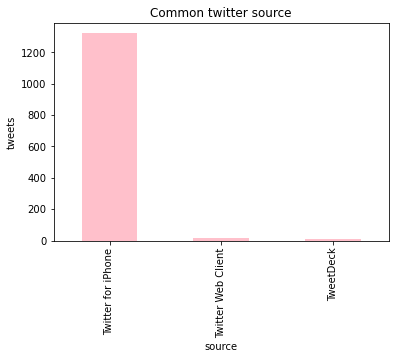

In [58]:
#vidsualise source data
graph = source.plot.bar(color='pink', fontsize= 10)

#put labels on graph
plt.title('Common twitter source')
plt.xlabel('source')
plt.ylabel('tweets')

<AxesSubplot:title={'center':'Twitter Sources'}, ylabel='source'>

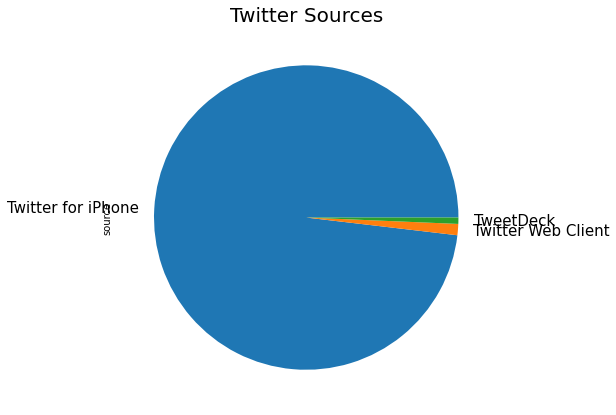

In [59]:
# Plot total counts for 3 sources in pie chart
plt.title("Twitter Sources", size=20)
twitter_archive_master['source'].value_counts().plot(kind='pie',figsize=(7,7),fontsize=15)
#plt.ylabel('');

> **Insight 1**
> * We used a bar graph and pie chart to display results from the source column and we see that both visuals indicate that majority of engagement come from "twitter for iphone" and "Tweet Deck" is the lowest source on the columns. This may give us the perception that most twitter users are on their mobile phones.

In [60]:
#display name values count
twitter_archive_master.name.value_counts()

Charlie           11
Lucy              10
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Winston            8
Daisy              7
Lola               7
Toby               7
Jax                6
Bo                 6
Koda               6
Bella              6
Stanley            6
Scout              5
Leo                5
Rusty              5
Oscar              5
Chester            5
Buddy              5
Milo               5
Bailey             5
Louis              5
Dave               5
Chip               4
Alfie              4
Duke               4
Gus                4
Jerry              4
Reggie             4
Bear               4
Archie             4
Clark              4
Cassie             4
Gary               4
Finn               4
Bentley            4
Derek              4
Maggie             4
George             4
Brody              4
Jack               4
Oakley             4
Dexter             4
Winnie             4
Scooter      

In [61]:
#assign name to dog_name
dog_name = twitter_archive_master['name']

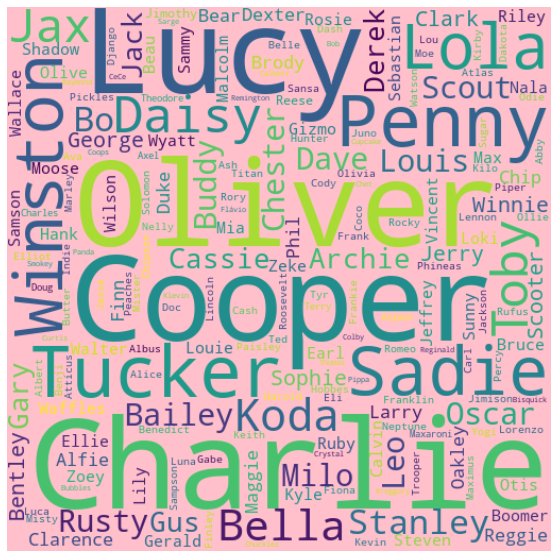

In [62]:
#join names to plot a wordcloud
style_name = (" ").join(dog_name)
custom_mask = np.array(Image.open('dog_shape.png'))
chart = WordCloud(width=800, height=350, background_color ='pink', mask=custom_mask).generate(style_name);

fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(chart, interpolation = 'bilinear')
plt.show()
chart.to_file("dog_name.png")

> **Insight 2**

> * This Word Cloud is great for displaying the names with most counts, it shows us that the large printed names are the most popular/common names given to dogs and the small printed names are the least popular/common names. We see that Charlie, Oliver and Lucy are displayed in large prints so it is accurate to say they fall under the top five of popular names. 

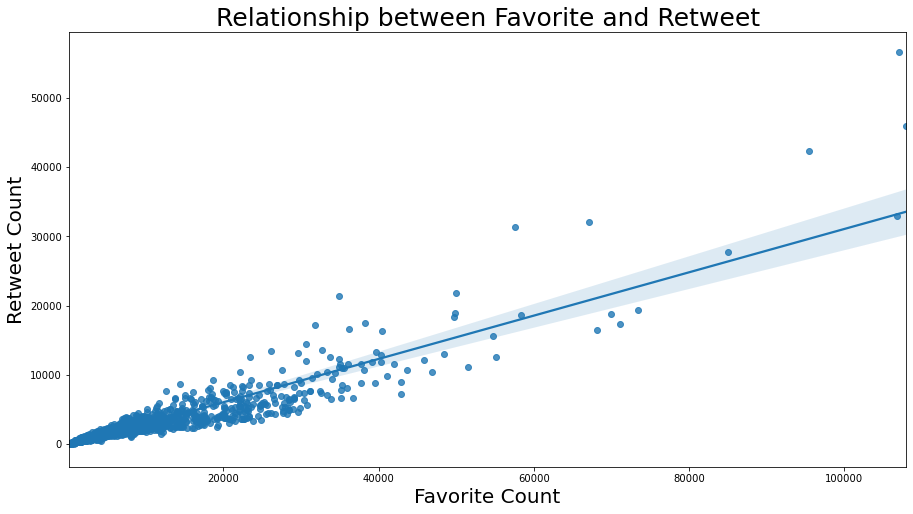

In [63]:
# Seaborn regplot
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title("Relationship between Favorite and Retweet", size=25)
sns.regplot(x='favorite_count', y='retweet_count', data=twitter_archive_master)
plt.ylabel("Retweet Count", size=20)
plt.xlabel("Favorite Count", size=20);

> **Insight 3**

> * This scatter plot between Favorite Count and Retweet Count shows a positive correlation between the two, this tells us that users who favour a tweet are most likely to retweet it.

### Insights:

1. Most popular source of tweets are "twitter for iPhone".

2. Charlie, Cooper, Lucy, Penny and Tucker are 1 of the popular names for dogs.

3. We see a great correlation between retweet_count and favorite_count.

> **REFERENCES**

> **UDACITY CLASSROOM TUTORIALS**

> https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
> https://www.youtube.com/watch?v=eHxWshJpoRk&ab_channel=Pythonenthusiast
> https://re-thought.com/creating-wordclouds-in-python/
> https://stackoverflow.com/questions/43043437/wordcloud-python-with-generate-from-frequencies
> https://pandas.pydata.org/docs/user_guide/merging.html
> https://pandas.pydata.org/docs/reference/api/pandas.Series.str.islower.html#pandas.Series.str.islower
> https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b